In [1]:
# TensorFlow2.x and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.9.1'

In [2]:
# 패션 MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
type(train_images), type(train_labels), type(test_images), type(test_labels)

# image는 훈련이다.
# label이 결과값이다.

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [4]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [5]:
class_names = ['T-shirt/top',  'Trouser',  'Pullover',  'Dress', 'Coat',
               'Sandal',       'Shirt',    'Sneaker',   'Bag',   'Ankle boot' ]

# 밑에 5x5에 뿌려준다.

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
sorted(set(train_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


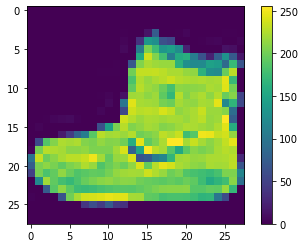

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

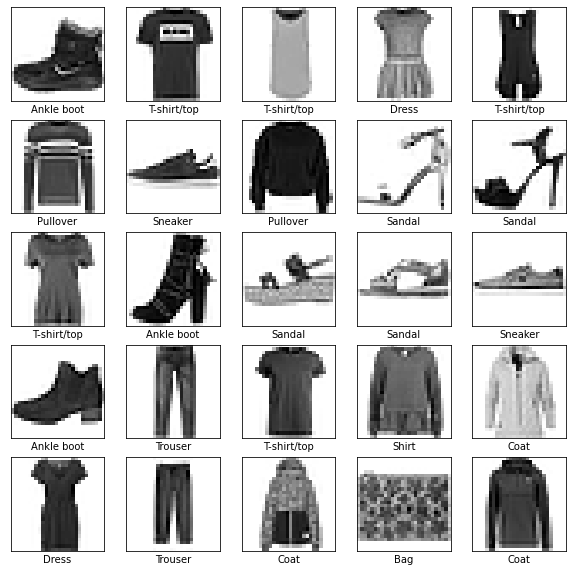

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])    # 분류 라벨명
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# activation='relu'모델은? 
# : 0보다 작을때는 0이고 0보다 클때는 기울기가 1인 liner를 반환한다.
# 극대화해서 뽑아낸다.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# optimizer='adam''아담이라는 사람이 만든 아담옵티마이저 

In [16]:
model.fit(train_images, train_labels, epochs=10)

# loss가 cost이다. 줄어들면 학습이 잘되고 있다.
# accuracy가 중요하다.


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4969 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3713 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3345 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2812 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2613 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2486 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3313 - accuracy: 0.8823 - 402ms/epoch - 1ms/step

Test accuracy: 0.8823000192642212


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 971us/step


In [20]:
predictions[0]

array([2.8004590e-10, 7.8550368e-11, 1.6000543e-10, 3.5799583e-09,
       6.9140504e-10, 7.9390137e-03, 3.3835729e-08, 5.7301549e-03,
       4.7057037e-07, 9.8633027e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array) 
    #맞으면 블루, 틀리면 레트
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

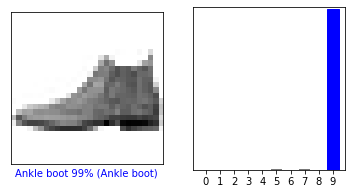

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

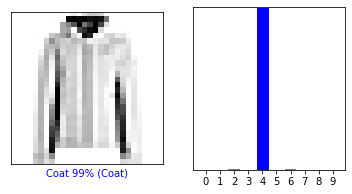

In [25]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

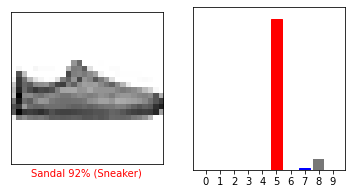

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

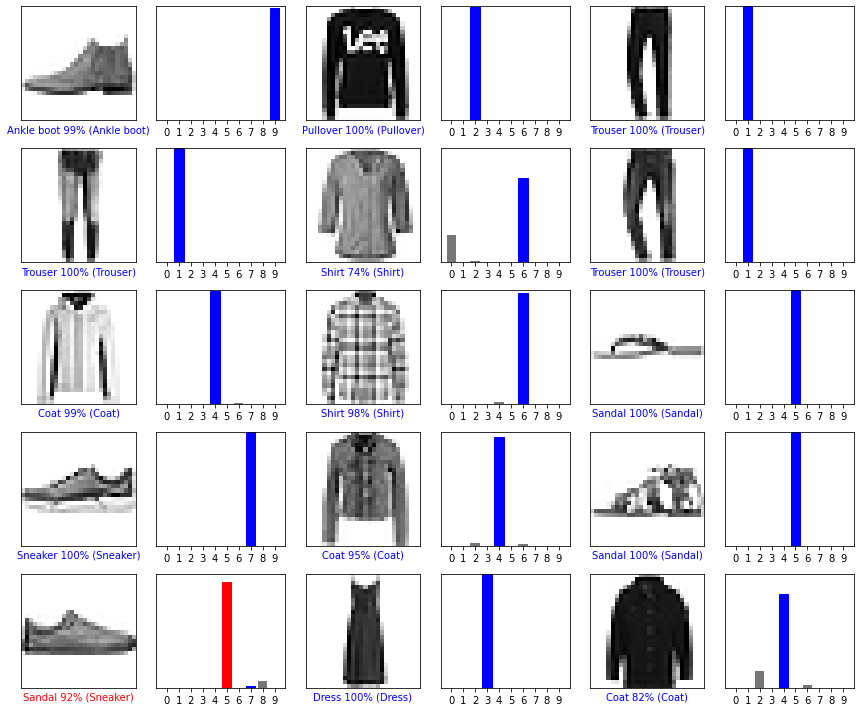

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 13ms/step
[[1.6492026e-05 1.1486086e-17 9.9865687e-01 4.9207545e-09 2.8507502e-04
  8.5712584e-09 1.0416032e-03 1.1125651e-13 3.3361185e-11 2.5051489e-13]]


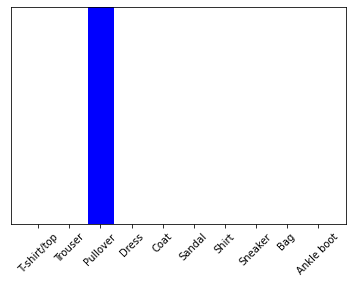

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
pred_idx = np.argmax(predictions_single[0])
pred_idx

2

In [33]:
class_names[pred_idx]

'Pullover'

### 캐라스가 이미지로 예측했다. 텐스플로우 2가 이렇게 하는게 추가되었다.

### sessoion을 안해도 불러올 수 있다.